# DNN Credit Card Detection From Scratch 

# NOT COMPLETE

* The model performs poorly, either the dataset isn't processed correctly or no significant insights can be derived from the data or this DNN architecture isn't the right one, for temporal datasets LSTM are a better fit.

[kaggle dataset url](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data)

The model will 
* use Adam Optimizer
* schedule the learning rate to decrease by epoch, also see how it performs when the learning rate stays the same
* use mini-batches for the training examples

From kaggle web dataset:
> It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

### Get The Data

In [2]:
df = pd.read_csv('./datasets/creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


We have 30 features, and the labels is either a 0 for no fraud or a 1 if that transaction was fraud

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Preprocess Data

In [4]:
num_classes = len(df["Class"].unique())
num_classes # the number of classes model has to predict given features

2

In [5]:
# Split the labels and features
Y_df = df[["Class"]]
X_df = df.drop(columns=["Class"])

In [6]:
df.drop(columns="Class")

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [7]:
X_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000


##### Split And Normalize
subtract the mean and divide by the standard deviation of each feature

In [8]:
def Split_data(X_df, Y_df):
    # split the df into train val and test sets with tuples of (features, labels)
    # 70% 20% 10%
    # column_indices = {name: i for i, name in enumerate(df.drop.columns)}
    # normalize, You should save the mean and std values to use during inference
    train_mean = X_df.mean()
    train_std = X_df.std()

    n = len(X_df)
    X_train = X_df[0:int(n*0.7)]
    Y_train = Y_df[0:int(n*0.7)]

    X_val = X_df[int(n*0.7):int(n*0.9)]
    Y_val = Y_df[int(n*0.7):int(n*0.9)]

    X_test = X_df[int(n*0.9):]
    Y_test = X_df[int(n*0.9):]
    # num_features = X_df.shape[1]

    # now using the mean and std that was computed over the end features dataset use it to normalize the features
    X_train = (X_train - train_mean) / train_std
    X_val = (X_val - train_mean) / train_std
    X_test = (X_test - train_mean) / train_std

    test_set = (X_test.values, Y_test.values)
    val_set = (X_val.values, Y_val.values)
    train_set = (X_train.values, Y_train.values)

    return train_set, val_set, test_set, train_mean, train_std

In [9]:
X_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [10]:
X_df.head(1) # before normalization

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62


In [11]:
train_set, val_set, test_set, train_mean, train_std = Split_data(X_df, Y_df)

In [12]:
train_set[0][:1, :] # after normalization now its a numpy array instead of dataframe

array([[-1.99657952, -0.6942411 , -0.04407485,  1.67277056,  0.97336381,
        -0.24511615,  0.34706734,  0.1936786 ,  0.08263713,  0.3311272 ,
         0.0833854 , -0.54040609, -0.61829463, -0.99609717, -0.32460962,
         1.60401102, -0.53683193,  0.24486302,  0.03076988,  0.49628116,
         0.32611744, -0.02492332,  0.38285377, -0.17691102,  0.11050673,
         0.24658501, -0.39216974,  0.33089104, -0.06378104,  0.24496383]])

In [13]:
train_set[0].shape, train_set[1].shape
# (num_examples,   num_features_per_example)

((199364, 30), (199364, 1))

Now, peek at the distribution of the features. Some features do have long tails.

/var/folders/kg/7xftw3_12y10ppg5bv5lb26w0000gn/T/ipykernel_85654/3214313372.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(df.keys(), rotation=90)


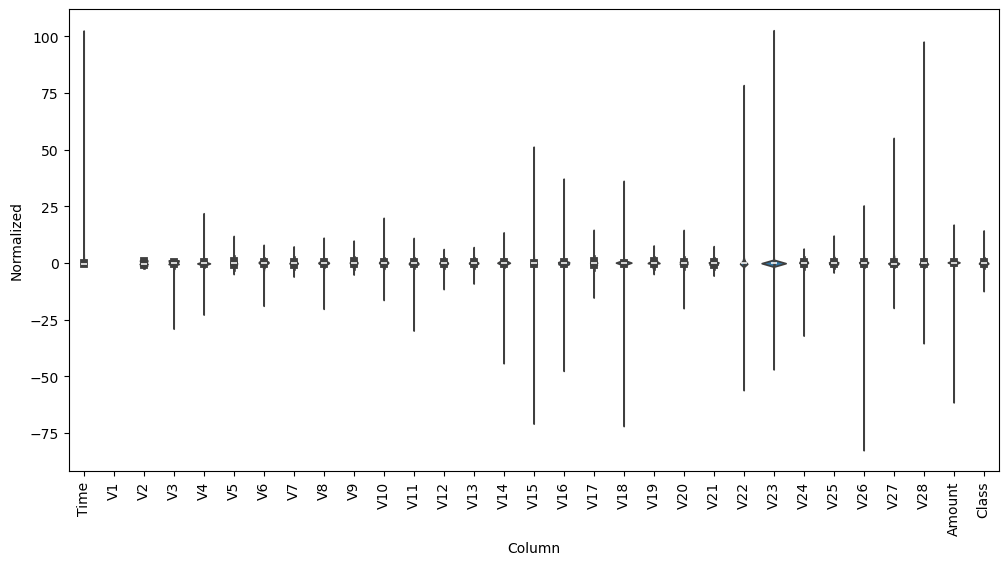

In [14]:
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

### Split Features and labels Into Batches

With mini-batch gradient descent, you loop over the mini-batches instead of looping over individual training examples.

* Also im shuffling the data, normally for timeseries data u want to keep the data unshuffled but I dont think for transactional data it matters much. And we only shuffle the train features and labels.

In [15]:
def random_mini_batches(X, Y, mini_batch_size = 64):
    """
    Creates a list of random minibatches from (X, Y)
    
    Arguments:
    X -- input data, of shape (number of examples, input size)
    Y -- true "label" vector (1 for fraud / 0 for no fraud), of shape (number of examples, 1)
    mini_batch_size -- size of the mini-batches, integer
    
    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """
    
    m = X.shape[0] # number of training examples
    mini_batches = []
    
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[permutation, :]
    shuffled_Y = Y[permutation, :].reshape((m, 1))
    inc = mini_batch_size

    # Step 2 - Partition (shuffled_X, shuffled_Y).
    # Now we partition the examples into mini-bactches, this is only for the group of examples that fit into 64 examples.
    num_complete_minibatches = math.floor(m / mini_batch_size) # number of complete mini batches that can be made their will be some examples left over
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[ inc * k : inc * (k + 1), : ]
        mini_batch_Y = shuffled_Y[ inc * k : inc * (k + 1), : ]
        
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # For handling the end case for the last examples that are less than the mini-batch size, example we have 40 examples left
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[ -(m - mini_batch_size * num_complete_minibatches) :,  ]
        mini_batch_Y = shuffled_Y[ -(m - mini_batch_size * num_complete_minibatches) :,  ]
        
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

###### Example of above function

In [28]:
# example of what the funtion does above
m = train_set[0].shape[0] # number of training examples
mini_batches = []

# Step 1: Shuffle (X, Y)
permutation = list(np.random.permutation(m))
shuffled_X = train_set[0][permutation, :]
shuffled_Y = train_set[1][permutation, :].reshape((m, 1))
mini_batch_size = 64
inc = mini_batch_size

# Step 2 - Partition (shuffled_X, shuffled_Y).
# Now we partition the examples into mini-bactches, this is only for the group of examples that fit into 64 examples.
num_complete_minibatches = math.floor(m / mini_batch_size) # number of complete mini batches that can be made their will be some examples left over
num_complete_minibatches, train_set[0].shape[0] / mini_batch_size

(3115, 3115.0625)

In [ ]:
for k in range(0, num_complete_minibatches):
    # print(inc) # = 64
    # print(k) # loop through each mini batch that can be made
    # print(inc * k) # gives num from 0 to 64 to 128 etcc size of minibatches
    # print(inc * k)
    # below slices the examples into a batch the inc * k is the start of a slice, the the inc * (k + 1) is the end of 0 to 64, 64 to 128 etc..
    mini_batch_X = shuffled_X[ inc * k : inc * (k + 1), : ]
    mini_batch_Y = shuffled_Y[ inc * k : inc * (k + 1), : ]
    
    mini_batch = (mini_batch_X, mini_batch_Y) # append to arr of tuple with corresponding (feature, label)
    mini_batches.append(mini_batch)

In [ ]:
X, Y = mini_batches[0]

In [37]:
# X.shape # 

In [40]:
199364 / mini_batch_size # .0625 examples left over

3115.0625

In [39]:
shuffled_X.shape

(199364, 30)

In [45]:
shuffled_X[ -(m - mini_batch_size * num_complete_minibatches) :,  ].shape

(4, 30)

In [47]:
shuffled_Y[ -(m - mini_batch_size * num_complete_minibatches) :,  ].shape

(4, 1)

### Adam optimizer

Adam is one of the most effective optimization algorithms for training neural networks. It combines ideas from RMSProp and Momentum. 

**How does Adam work?**
1. It calculates an exponentially weighted average of past gradients, and stores it in variables $v$ (before bias correction) and $v^{corrected}$ (with bias correction). 
2. It calculates an exponentially weighted average of the squares of the past gradients, and  stores it in variables $s$ (before bias correction) and $s^{corrected}$ (with bias correction). 
3. It updates parameters in a direction based on combining information from "1" and "2".

In [16]:
def initialize_adam(parameters) :
    """
    Initializes v and s as two python dictionaries with:
                - keys: "dW1", "db1", ..., "dWL", "dbL" 
                - values: numpy arrays of zeros of the same shape as the corresponding gradients/parameters.
    
    Arguments:
    parameters -- python dictionary containing your parameters.
                    parameters["W" + str(l)] = Wl
                    parameters["b" + str(l)] = bl
    
    Returns: 
    v -- python dictionary that will contain the exponentially weighted average of the gradient. Initialized with zeros.
                    v["dW" + str(l)] = ...
                    v["db" + str(l)] = ...
    s -- python dictionary that will contain the exponentially weighted average of the squared gradient. Initialized with zeros.
                    s["dW" + str(l)] = ...
                    s["db" + str(l)] = ...

    """
    
    L = len(parameters) // 2 # number of layers in the neural networks
    v = {}
    s = {}
    
    # Initialize v, s. Input: "parameters". Outputs: "v, s".
    for l in range(1, L + 1):
        v["dW" + str(l)] = np.zeros(( parameters["W" + str(l)].shape ))
        v["db" + str(l)] = np.zeros(( parameters["b" + str(l)].shape ))
        s["dW" + str(l)] = np.zeros(( parameters["W" + str(l)].shape ))
        s["db" + str(l)] = np.zeros(( parameters["b" + str(l)].shape ))
    return v, s

In [17]:
def update_parameters_with_adam(parameters, grads, v, s, t, learning_rate = 0.01,
                                beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8):
    """
    Update parameters using Adam
    
    Arguments:
    parameters -- python dictionary containing your parameters:
                    parameters['W' + str(l)] = Wl
                    parameters['b' + str(l)] = bl
    grads -- python dictionary containing your gradients for each parameters:
                    grads['dW' + str(l)] = dWl
                    grads['db' + str(l)] = dbl
    v -- Adam variable, moving average of the first gradient, python dictionary
    s -- Adam variable, moving average of the squared gradient, python dictionary
    t -- Adam variable, counts the number of taken steps
    learning_rate -- the learning rate, scalar.
    beta1 -- Exponential decay hyperparameter for the first moment estimates 
    beta2 -- Exponential decay hyperparameter for the second moment estimates 
    epsilon -- hyperparameter preventing division by zero in Adam updates

    Returns:
    parameters -- python dictionary containing your updated parameters 
    v -- Adam variable, moving average of the first gradient, python dictionary
    s -- Adam variable, moving average of the squared gradient, python dictionary
    """
    
    L = len(parameters) // 2                 # number of layers in the neural networks
    v_corrected = {}                         # Initializing first moment estimate, python dictionary
    s_corrected = {}                         # Initializing second moment estimate, python dictionary
    
    # Perform Adam update on all parameters
    for l in range(1, L + 1):
        # Moving average of the gradients. Inputs: "v, grads, beta1". Output: "v".
        v["dW" + str(l)] = beta1 * v["dW" + str(l)] + ( 1 - beta1 ) * grads["dW" + str(l)]
        v["db" + str(l)] = beta1 * v["db" + str(l)] + ( 1 - beta1 ) * grads["db" + str(l)]
        
        # Compute bias-corrected first moment estimate. Inputs: "v, beta1, t". Output: "v_corrected".
        v_corrected["dW" + str(l)] = v["dW" + str(l)] / (1 - ( beta1 )**t )
        v_corrected["db" + str(l)] = v["db" + str(l)] / (1 - ( beta1 )**t )
        
        # Moving average of the squared gradients. Inputs: "s, grads, beta2". Output: "s".
        s["dW" + str(l)] = beta2 * s["dW" + str(l)] + ( 1 - beta2 ) * (grads["dW" + str(l)])**2
        s["db" + str(l)] = beta2 * s["db" + str(l)] + ( 1 - beta2 ) * (grads["db" + str(l)])**2
        
        # Compute bias-corrected second raw moment estimate. Inputs: "s, beta2, t". Output: "s_corrected".
        s_corrected["dW" + str(l)] = s["dW" + str(l)] / ( 1 - (beta2)**t ) 
        s_corrected["db" + str(l)] = s["db" + str(l)] / ( 1 - (beta2)**t )         

        # Update parameters. Inputs: "parameters, learning_rate, v_corrected, s_corrected, epsilon". Output: "parameters".
        parameters["W" + str(l)] = parameters["W" + str(l)] - learning_rate * ( v_corrected["dW" + str(l)] / ( np.sqrt(s_corrected["dW" + str(l)]) + epsilon) )
        parameters["b" + str(l)] = parameters["b" + str(l)] - learning_rate * ( v_corrected["db" + str(l)] / ( np.sqrt(s_corrected["db" + str(l)]) + epsilon) ) 

    return parameters, v, s, v_corrected, s_corrected

### Helper Functions

In [194]:
def sigmoid(x):
    """
    Compute the sigmoid of x

    Arguments:
    x -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(x)
    """
    s = 1/(1+np.exp(-x))
    return s

def relu(x):
    """
    Compute the relu of x

    Arguments:
    x -- A scalar or numpy array of any size.

    Return:
    s -- relu(x)
    """
    s = np.maximum(0,x)
    
    return s

def initialize_parameters(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    W1 -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    b1 -- bias vector of shape (layer_dims[l], 1)
                    Wl -- weight matrix of shape (layer_dims[l-1], layer_dims[l])
                    bl -- bias vector of shape (1, layer_dims[l])
    """
    parameters = {}
    L = len(layer_dims) # number of layers in the network

    # the first layer is the input layer which has the examples per example we dont have Weights and biases for that layer just the hidden layers
    for l in range(1, L):
        # so the weight matrix is the neurons at that layer and then taking in the neurons from the previous layer,
        # in the first hidden layer, it has example 10 neurons then it takes in the input data of example 20 features so that 
        # layer will have a shape of (10, 20), same with bias but just 10 neuron, by 1
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1])*  np.sqrt(2 / layer_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
    return parameters


def compute_cost(a3, Y):
    
    """
    Implement the cost function, this one is Binary Cross-Entropy Loss
    
    Arguments:
    a3 -- post-activation, output of forward propagation
    Y -- "true" labels vector, same shape as a3
    
    Returns:
    cost - value of the cost function without dividing by number of training examples
    
    Note: 
    This is used with mini-batches, so we'll first accumulate costs over an entire epoch and then divide by the m training examples
    this loss function is commonly used to measure the difference between the predicted probabilities (a3 in this case) and the actual labels (Y).
    """

    epsilon = 1e-5 # we use a small epsilon value so that the function below doesn't divide by zero if chance
    log_probs = np.multiply(-np.log(a3 + epsilon), Y) + np.multiply(-np.log(1 - a3 + epsilon), 1 - Y)
    cost_total = np.sum(log_probs)
    # without epsilon
    # log_probs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
    # cost_total =  np.sum(log_probs)
    
    return cost_total

def forward_propagation(X, parameters):
    """
    Implements the forward propagation (and computes the loss).
    
    Arguments:
    X -- input dataset, of shape (number of examples, input size)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3":
                    W1 -- weight matrix of shape ()
                    b1 -- bias vector of shape ()
                    W2 -- weight matrix of shape ()
                    b2 -- bias vector of shape ()
                    W3 -- weight matrix of shape ()
                    b3 -- bias vector of shape ()
    
    Returns:
    loss -- the loss function (vanilla logistic loss)
    """
    
    # retrieve parameters
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    # LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID
    # print("W1 shape:", W1.shape)
    # print("X shape:", X.T.shape,"x shape normal", X.shape)
    z1 = np.dot(W1, X.T) + b1
    # print("z1 shape:", z1.shape)
    a1 = relu(z1)
    z2 = np.dot(W2, a1) + b2
    a2 = relu(z2)
    z3 = np.dot(W3, a2) + b3
    a3 = sigmoid(z3)
    cache = (z1, a1, W1, b1, z2, a2, W2, b2, z3, a3, W3, b3)
    return a3, cache

def backward_propagation(X, Y, cache):
    """
    Implement the backward propagation presented.
    
    Arguments:
    X -- input dataset, of shape (number of examples, input size)
    Y -- true "label" vector (containing 0 if non-fraud, 1 if fraud)
    cache -- cache output from forward_propagation()
    
    Returns:
    gradients -- A dictionary with the gradients with respect to each parameter, activation and pre-activation variables
    """
    m = X.shape[0]
    (z1, a1, W1, b1, z2, a2, W2, b2, z3, a3, W3, b3) = cache
    
    dz3 = 1./m * (a3 - Y.T)
    dW3 = np.dot(dz3, a2.T)
    db3 = np.sum(dz3, axis=1, keepdims = True)
    
    da2 = np.dot(W3.T, dz3)
    dz2 = np.multiply(da2, np.int64(a2 > 0))
    dW2 = np.dot(dz2, a1.T)
    db2 = np.sum(dz2, axis=1, keepdims = True)
    
    da1 = np.dot(W2.T, dz2)
    dz1 = np.multiply(da1, np.int64(a1 > 0))
    dW1 = np.dot(dz1, X)
    db1 = np.sum(dz1, axis=1, keepdims = True)
    
    gradients = {"dz3": dz3, "dW3": dW3, "db3": db3,
                "da2": da2, "dz2": dz2, "dW2": dW2, "db2": db2,
                "da1": da1, "dz1": dz1, "dW1": dW1, "db1": db1}
    
    return gradients

def predict(X, y, parameters):
    """
    This function is used to predict the results of a  n-layer neural network.
    
    Arguments:
    X -- data set of examples you would like to label
    parameters -- parameters of the trained model
    
    Returns:
    p -- predictions for the given dataset X
    """
    
    m = X.shape[0]
    p = np.zeros((m, 1), dtype = int)
    
    # Forward propagation
    a3, caches = forward_propagation(X, parameters)
    # return a3, p
    # convert probas to 0/1 predictions
    for i in range(0, a3.shape[1]):
        if a3[0,i] > 0.5:
            p[i, 0] = 1
        else:
            p[i, 0] = 0

    # print ("predictions: " + str(p[0,:]))
    # print ("true labels: " + str(y[0,:]))
    # print("Accuracy: "  + str(np.mean((p[:, 0] == y[:, 0]))))
    return p

### Model

In [202]:
def model(X, Y, layers_dims, learning_rate = 0.0007, mini_batch_size = 64, beta = 0.9,
        beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8, num_epochs = 50, print_cost = True):
    """
    Arguments:
    X -- input data, of shape (number of examples, input)
    Y -- true "label" vector (1 for fraud / 0 no fraud), of shape (number of examples, 1)
    layers_dims -- python list, containing the size of each layer
    learning_rate -- the learning rate, scalar.
    mini_batch_size -- the size of a mini batch
    beta -- Momentum hyperparameter
    beta1 -- Exponential decay hyperparameter for the past gradients estimates 
    beta2 -- Exponential decay hyperparameter for the past squared gradients estimates 
    epsilon -- hyperparameter preventing division by zero in Adam updates
    num_epochs -- number of epochs the number of times the model sees the whole dataset, if 50 the model sees the dataset 50 times
    print_cost -- True to print the cost every 1000 epochs

    Returns:
    parameters -- python dictionary containing your updated parameters 
    """

    L = len(layers_dims)             # number of layers in the neural networks
    costs = []                       # to keep track of the cost
    t = 0                            # initializing the counter required for Adam update
    m = X.shape[0]                   # number of training examples
    
    # Initialize parameters
    parameters = initialize_parameters(layers_dims)

    v, s = initialize_adam(parameters)
    # seed = 1
    # Optimization loop
    for i in range(num_epochs):
        # Define the random minibatches. We increment the seed to reshuffle differently the dataset after each epoch
        # seed = seed + 1
        minibatches = random_mini_batches(X, Y, mini_batch_size)
        cost_total = 0
        
        for minibatch in minibatches:

            # Select a minibatch
            (minibatch_X, minibatch_Y) = minibatch
            # Forward propagation
            a3, caches = forward_propagation(minibatch_X, parameters)
            # return a3, caches, minibatch_X, minibatch_Y #testing
            # Compute cost and add to the cost total
            cost_total += compute_cost(a3, minibatch_Y)

            # Backward propagation
            grads = backward_propagation(minibatch_X, minibatch_Y, caches)

            t = t + 1 # Adam counter
            parameters, v, s, _, _ = update_parameters_with_adam(parameters, grads, v, s, t, learning_rate, beta1, beta2,  epsilon)
        cost_avg = cost_total / m
        
        # Print the cost every 5 epochs
        if print_cost and i % 5 == 0:
            print ("Cost after epoch %i: %f" %(i, cost_avg))
        if print_cost and i % 5 == 0:
            costs.append(cost_avg)
                
    # plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('epochs (per 5)')
    plt.title("Learning rate = " + str(learning_rate))
    plt.show()

    return parameters

###### TESTING MODEL Ignore, code only to clarify

In [123]:
input_layer_size = train_set[0].shape[1] # the amount of features per example
layers_dims = [input_layer_size, 5, 2, 1]
input_layer_size

30

In [124]:
train_X, train_Y = train_set
a3, caches, minibatch_X, minibatch_Y  = model(train_X, train_Y, layers_dims)

In [125]:
a3.shape #the output of the last minibatch is 1, this is only one loop so we only got one minibatch with 64 examples

(1, 64)

In [126]:
z1, a1, W1, b1, z2, a2, W2, b2, z3, a3, W3, b3 = caches
z1.shape, a1.shape, W1.shape, b1.shape, z2.shape, a2.shape, W2.shape, b2.shape, z3.shape, a3.shape, W3.shape, b3.shape

((5, 64),
 (5, 64),
 (5, 30),
 (5, 1),
 (2, 64),
 (2, 64),
 (2, 5),
 (2, 1),
 (1, 64),
 (1, 64),
 (1, 2),
 (1, 1))

### Train The Model

Cost after epoch 0: 6.714544
Cost after epoch 5: 1.284390
Cost after epoch 10: 1.348642
Cost after epoch 15: 1.396907
Cost after epoch 20: 1.418634
Cost after epoch 25: 1.425964
Cost after epoch 30: 1.421834
Cost after epoch 35: 1.433442
Cost after epoch 40: 1.450739
Cost after epoch 45: 1.456931
Cost after epoch 50: 1.456913
Cost after epoch 55: 1.460704
Cost after epoch 60: 1.483865
Cost after epoch 65: 1.473617
Cost after epoch 70: 1.472461
Cost after epoch 75: 1.472337
Cost after epoch 80: 1.488360
Cost after epoch 85: 1.487793
Cost after epoch 90: 1.491437
Cost after epoch 95: 1.491852


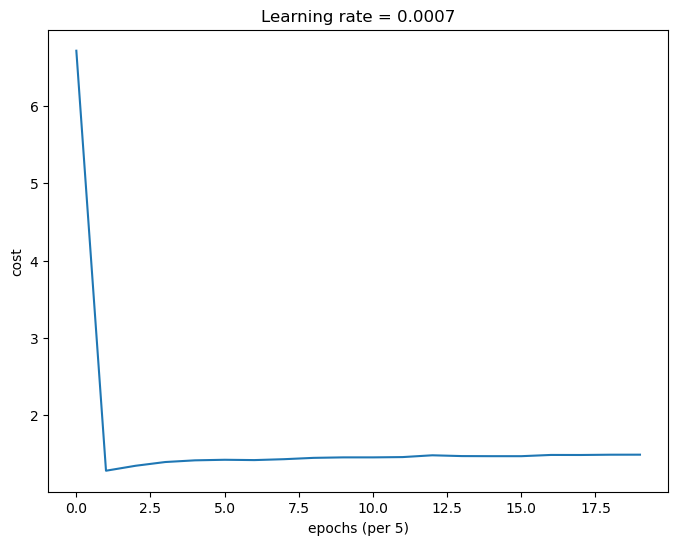

In [203]:
# train 3-layer model, # for more layers you would need to edit the model and parameters its hardcoded for 3 layers
input_layer_size = train_set[0].shape[1] # the amount of features per example
mini_batch_size = 64
layers_dims = [input_layer_size, 5, 2, 1]
train_X, train_Y = train_set
parameters = model(train_X, train_Y, layers_dims, mini_batch_size=mini_batch_size, num_epochs=100)

In [204]:
parameters

{'W1': array([[ 1.12156351e+00, -9.23778333e-01, -2.13316638e-01,
         -2.01607791e-02, -1.68762169e-01, -1.08993666e+00,
          2.02264246e-01, -3.29563682e-01,  4.52458357e-01,
          3.50651935e-01, -1.23929665e-01,  7.94477811e-01,
          3.79148255e-01,  5.49190071e-01,  3.63354231e-01,
          5.23129994e-02,  1.06547964e-01, -8.54839181e-02,
          1.38105501e+00, -2.10051485e-01, -9.40049020e-01,
         -5.35050419e-01, -4.65180958e-01,  3.66049510e-01,
         -1.71084691e+00, -1.35222850e+00,  2.77846422e-01,
         -3.05251201e-01,  1.52477075e-01, -2.96582041e-02],
        [ 3.77846703e-01,  3.47014459e-01,  5.72630636e-02,
         -1.63584944e-01, -6.72832398e-01,  9.77505278e-01,
         -2.73775243e-01,  2.63007023e-01, -2.18814446e-01,
          1.09335676e-01,  3.41800895e-01, -1.07661779e+00,
         -3.02047182e-01, -5.79401569e-01, -4.18383130e-02,
         -3.94477628e-01, -3.00333178e-01,  6.31226921e-02,
         -3.56172762e-01, -6.1189

### Predict

In [205]:
X_val, Y_val = val_set
X_val.shape

(56962, 30)

In [206]:
predictions = predict(X_val, Y_val, parameters)
predictions.shape

(56962, 1)

In [211]:
# it would be easy for the model to predict zero as its unsure so, test only if it 
# correctly predicts a fraud transactions
# Create a boolean mask where both pred and Y have a value of 1
mask = (predictions == 1) & (Y == 1)
# Count the number of True values in the mask
num_matches = mask.sum()
# Print the count of matches
print("Number of matches:", num_matches)

Number of matches: 0
